In [1]:
pip install requests beautifulsoup4 nltk pandas openpyxl textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 626.3/626.3 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import re
import os

In [3]:
input_df = pd.read_excel('Input.xlsx')

In [5]:
for _, row in input_df.iterrows():
    url_id = row['URL_ID']
    url = row['URL']
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Try to find the title
        title = None
        for tag_name in ['title', 'h1', 'h2']:
            title_tag = soup.find(tag_name)
            if title_tag:
                title = title_tag.get_text().strip()
                break
        if not title:
            title = "No Title Found"  # Placeholder if no title tag is found

        # Try to find the main text content
        text = ""
        for tag_name in ['p', 'div']:
            paragraphs = soup.find_all(tag_name)
            if paragraphs:
                text = "\n".join([para.get_text().strip() for para in paragraphs])
                break
        if not text:
            text = "No Text Found"  # Placeholder if no text content is found

        # Save the content to a text file
        with open(f'articles/{url_id}.txt', 'w', encoding='utf-8') as file:
            file.write(f"{title}\n\n{text}")

    except Exception as e:
        print(f"Failed to extract {url}: {e}")


Text Cleaning

In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Load Stop Words
stop_words = set()
for file in ['C:\\Users\\Shivam\\Desktop\\Black Coffer\\StopwWords\\StopWords_Auditor.txt', 'C:\\Users\\Shivam\\Desktop\\Black Coffer\\StopwWords\\StopWords_DatesandNumbers.txt', 'C:\\Users\\Shivam\\Desktop\\Black Coffer\\StopwWords\\StopWords_Generic.txt']:
    with open(file, 'r', encoding='utf-8') as f:
        stop_words.update(f.read().splitlines())

def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize words
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return words


Sentiment Analysis

In [15]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [16]:
import chardet

file_path = 'C:\\Users\\Shivam\\Desktop\\Black Coffer\\MasterDictionary\\positive-words.txt'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    print(result)  # Output: {'encoding': '...', 'confidence': ..., 'language': '...'}

# Use detected encoding
detected_encoding = result['encoding']
with open(file_path, 'r', encoding=detected_encoding) as f:
    positive_words = set(f.read().splitlines())


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [17]:
import chardet

file_path = 'C:\\Users\\Shivam\\Desktop\\Black Coffer\\MasterDictionary\\negative-words.txt'

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read())
    print(result)  # Output: {'encoding': '...', 'confidence': ..., 'language': '...'}

# Use detected encoding
detected_encoding = result['encoding']
with open(file_path, 'r', encoding=detected_encoding) as f:
    positive_words = set(f.read().splitlines())


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [18]:
# Load Positive and Negative Words
with open('C:\\Users\\Shivam\\Desktop\\Black Coffer\\MasterDictionary\\positive-words.txt', 'r', encoding='ascii') as f:
    positive_words = set(f.read().splitlines())

with open('C:\\Users\\Shivam\\Desktop\\Black Coffer\\MasterDictionary\\negative-words.txt', 'r', encoding='ISO-8859-1') as f:
    negative_words = set(f.read().splitlines())

def sentiment_scores(words):
    positive_score = sum(1 for word in words if word in positive_words)
    negative_score = sum(1 for word in words if word in negative_words)
    polarity_score = (positive_score - negative_score) / ((positive_score + negative_score) + 0.000001)
    return positive_score, negative_score, polarity_score


Processing All Articles

In [19]:
import os

# Directory containing article files
articles_dir = 'C:\\Users\\Shivam\\Desktop\\Black Coffer\\articles'

# Initialize a list to store results
results = []

# Process each article file
for filename in os.listdir(articles_dir):
    if filename.endswith('.txt'):
        filepath = os.path.join(articles_dir, filename)
        with open(filepath, 'r', encoding='utf-8', errors='replace') as f:
            text = f.read()
        
        # Tokenize the text (split into words)
        words = text.split()  # Use a more advanced tokenizer if needed
        
        # Calculate sentiment scores
        pos_score, neg_score, pol_score = sentiment_scores(words)
        
        # Extract URL ID from filename (assuming it's part of the filename)
        url_id = os.path.splitext(filename)[0]
        
        # Append results
        results.append({
            'URL_ID': url_id,
            'Positive Score': pos_score,
            'Negative Score': neg_score,
            'Polarity Score': pol_score
        })

print("Processing complete!")


Processing complete!


In [20]:
import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Save to Excel
output_file = 'C:\\Users\\Shivam\\Desktop\\Black Coffer\\Sentiment_Scores.xlsx'
results_df.to_excel(output_file, index=False)

print(f"Results saved to {output_file}")


Results saved to C:\Users\Shivam\Desktop\Black Coffer\Sentiment_Scores.xlsx


Visualize

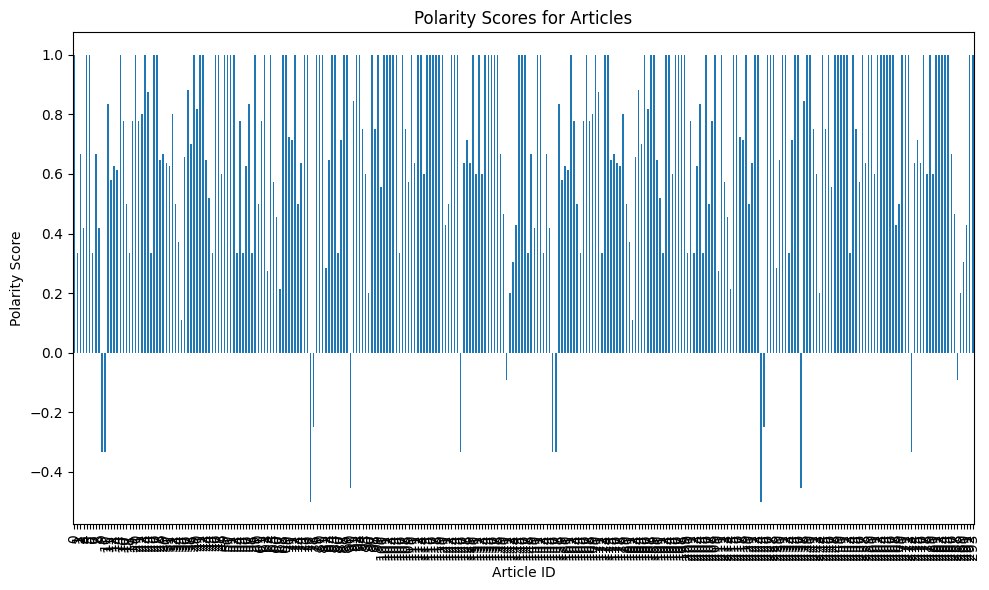

In [23]:
import matplotlib.pyplot as plt

# Plot polarity scores
results_df['Polarity Score'].plot(kind='bar', figsize=(10, 6))
plt.title("Polarity Scores for Articles")
plt.xlabel("Article ID")
plt.ylabel("Polarity Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


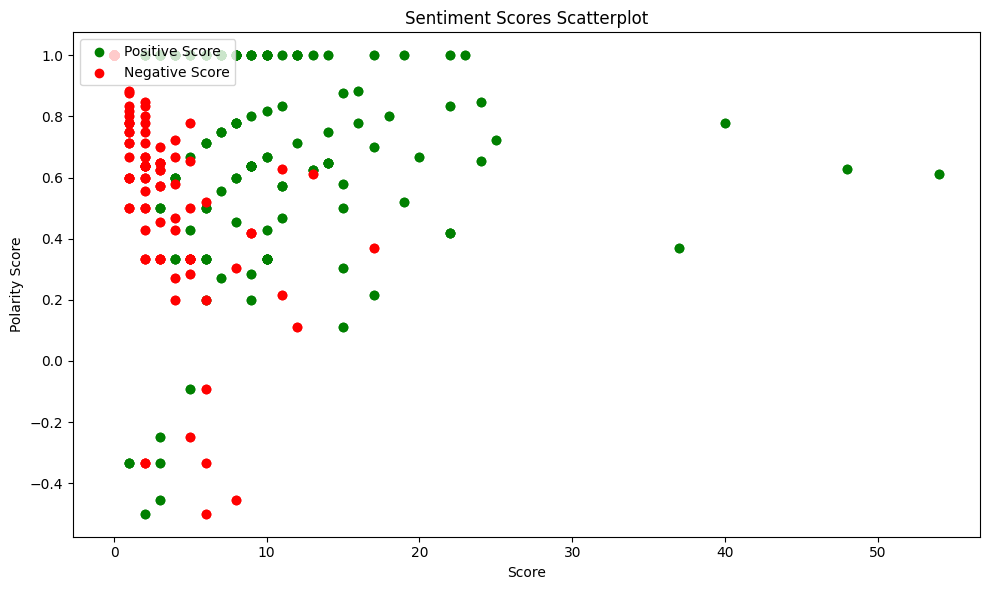

In [24]:
import matplotlib.pyplot as plt

# Assuming you have the results_df DataFrame containing all sentiment data
plt.figure(figsize=(10, 6))

# Scatter plot: Positive Score vs Polarity Score
plt.scatter(results_df['Positive Score'], results_df['Polarity Score'], color='green', label='Positive Score')
# Scatter plot: Negative Score vs Polarity Score
plt.scatter(results_df['Negative Score'], results_df['Polarity Score'], color='red', label='Negative Score')

# Labels and title
plt.title('Sentiment Scores Scatterplot')
plt.xlabel('Score')
plt.ylabel('Polarity Score')

# Display legend
plt.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()
